## Random Forest 
### Dataset: Car Evaluation

In [169]:
#Importing needed libraries
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import  accuracy_score

from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

In [170]:
#url of dataset
data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

In [171]:
#getting dataset
df = pd.read_csv(data_url, header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [172]:
# Column names
columns=['buying',
'maint',
'doors',
'persons',
'lug_boot',
'safety',
'class',
]

In [173]:
#getting the data with column names
df=pd.read_csv(data_url,header=None, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


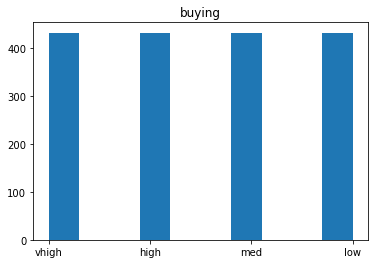

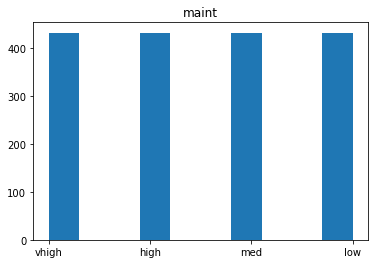

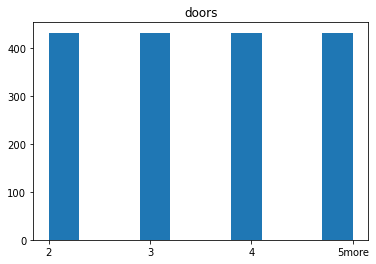

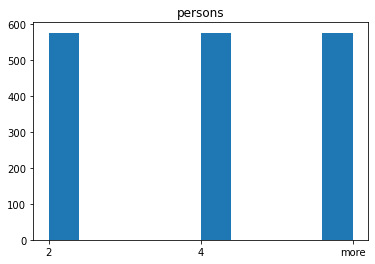

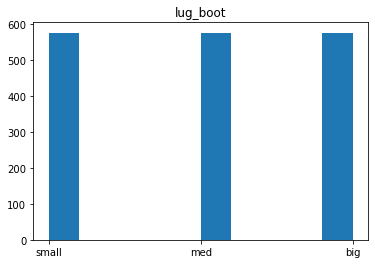

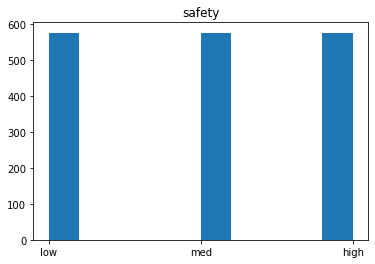

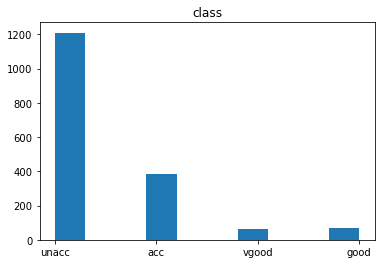

In [174]:
for col_name in df.columns:
    plt.figure()
    plt.hist(df[col_name])
    plt.title(col_name)

In [175]:
df.sample(20)

,buying,maint,doors,persons,lug_boot,safety,class
655,high,med,2,2,big,med,unacc
1636,low,low,2,4,big,med,good
1157,med,med,4,more,med,high,vgood
261,vhigh,med,3,more,small,low,unacc
1226,med,low,3,4,small,high,good
221,vhigh,med,2,2,med,high,unacc
1601,low,med,5more,2,big,high,unacc
1030,med,high,4,2,med,med,unacc
244,vhigh,med,3,2,small,med,unacc
1126,med,med,3,more,small,med,acc


In [176]:
oe = OrdinalEncoder()
for i in df.columns:
    cd=asarray(df[i])
    df[i]=oe.fit_transform(cd.reshape(-1,1))

df.sample(20)

,buying,maint,doors,persons,lug_boot,safety,class
1714,1.0,1.0,3.0,1.0,1.0,2.0,1.0
298,3.0,2.0,3.0,0.0,2.0,2.0,2.0
507,0.0,3.0,2.0,2.0,1.0,1.0,2.0
266,3.0,2.0,1.0,2.0,1.0,0.0,0.0
1188,2.0,1.0,0.0,0.0,2.0,1.0,2.0
1612,1.0,2.0,3.0,2.0,2.0,2.0,0.0
153,3.0,0.0,1.0,2.0,2.0,1.0,2.0
1424,1.0,0.0,0.0,2.0,2.0,0.0,2.0
1700,1.0,1.0,2.0,2.0,0.0,0.0,3.0
1289,2.0,1.0,3.0,2.0,2.0,0.0,1.0


In [177]:
df.dtypes

buying      float64
maint       float64
doors       float64
persons     float64
lug_boot    float64
safety      float64
class       float64
dtype: object

In [178]:
#Defining Feature and target
X,y=df.drop(['class'], axis=1), df['class']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [180]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [181]:
pred =clf.predict(X_test)

In [182]:
acc = accuracy_score(y_test, pred)
print('Accuracy:',(acc*100).round(2),'%')

Accuracy: 96.53 %


In [183]:
rfc=RandomForestClassifier()

In [184]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [185]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [186]:
df_Gr = pd.DataFrame(CV_rfc.cv_results_)
dfn = pd.DataFrame(df_Gr[['param_criterion','param_max_depth','param_max_features','param_n_estimators','mean_test_score']])

In [187]:
res_df=dfn.sort_values(by='mean_test_score',ascending=False)
res_df.head(10)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score
59,entropy,8,log2,500,0.945413
55,entropy,8,auto,500,0.942931
56,entropy,8,sqrt,200,0.942927
57,entropy,8,sqrt,500,0.941274
54,entropy,8,auto,200,0.941271
58,entropy,8,log2,200,0.937962
25,gini,8,auto,500,0.937132
28,gini,8,log2,200,0.936302
29,gini,8,log2,500,0.936298
27,gini,8,sqrt,500,0.935479


In [188]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}